In [2]:
# 📘 Notebook: 4_SpeedViolationAnalysis.ipynb
# Purpose: Analyze, visualize and log speed violations 

# 📦 Step 1: Import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

# Setup for visuals
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print(colored("📦 Step 1: Libraries loaded successfully", "green", attrs=['reverse']))



📦 Step 1: Libraries loaded successfully


In [3]:
# 📁 Step 2: Load Speed Alert Log CSV (from Notebook 2)
speed_alert_log_path = "output/speed_alert_log.csv"
if not os.path.exists(speed_alert_log_path):
    raise FileNotFoundError("❌ speed_alert_log.csv not found. Make sure Notebook 2 has run successfully.")

speed_df = pd.read_csv(speed_alert_log_path)
print(colored("📁 Step 2: Speed Alert Log loaded", "green", attrs=['reverse']))

📁 Step 2: Speed Alert Log loaded


In [4]:
# 🧹 Step 3: Basic Cleaning & Summary
speed_df.dropna(inplace=True)
speed_df['status'] = speed_df['status'].str.strip()
speed_df['frame'] = speed_df['frame'].astype(int)

print(colored(f"✅ Total Records: {len(speed_df)}", "blue"))
print(colored(f"🚗 Unique vehicle types: {speed_df['vehicle_type'].nunique()} - {speed_df['vehicle_type'].unique().tolist()}", "yellow"))

✅ Total Records: 3171
🚗 Unique vehicle types: 3 - ['car', 'truck', 'bus']


In [5]:
# 📊 Step 4: Count Overspeeding Instances
overspeed_df = speed_df[speed_df['status'] == 'OVER-SPEED']
print(colored(f"🚨 Overspeeding Cases: {len(overspeed_df)}", "red", attrs=['bold']))


🚨 Overspeeding Cases: 3171


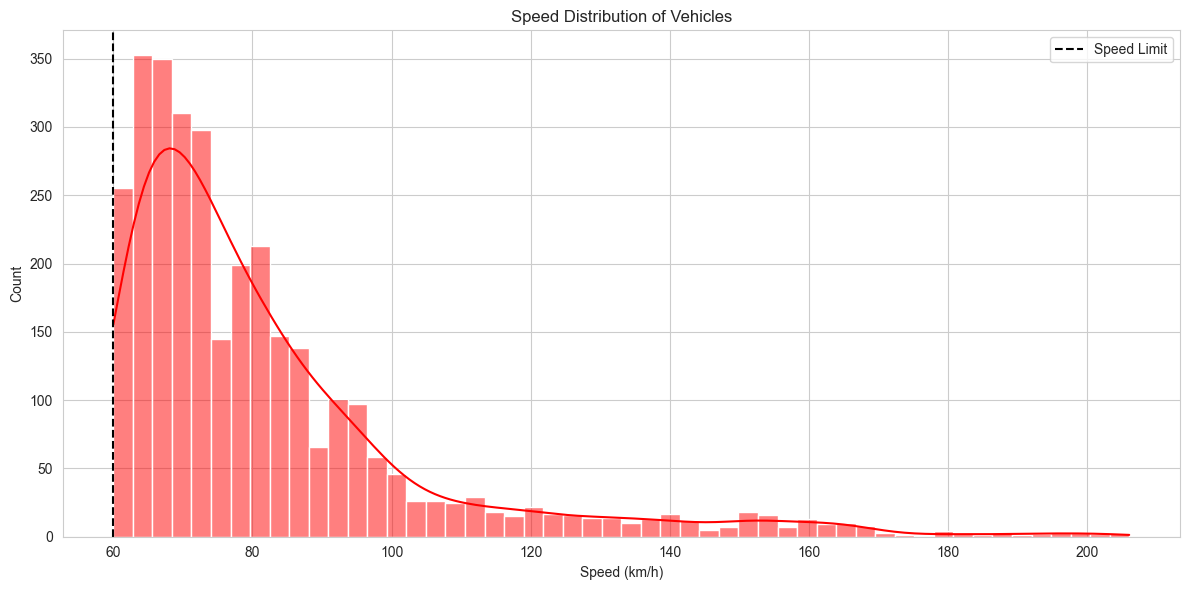

In [6]:
# 📈 Step 5: Plotting Vehicle Speed Distribution
plt.figure()
sns.histplot(speed_df, x="estimated_speed", hue="status", kde=True, palette={"OK": "green", "OVER-SPEED": "red"})
plt.axvline(x=60, color='black', linestyle='--', label='Speed Limit')
plt.title("Speed Distribution of Vehicles")
plt.xlabel("Speed (km/h)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# 📌 Step 6: Overspeed Violation Summary Table
summary_table = overspeed_df.groupby("vehicle_type").agg({
    "frame": "count",
    "estimated_speed": ["mean", "max"]
})
summary_table.columns = ["violation_count", "avg_speed", "max_speed"]
summary_table = summary_table.sort_values(by="violation_count", ascending=False)

print(colored("📌 Overspeed Violation Summary Table:", "cyan", attrs=['bold']))
display(summary_table)

📌 Overspeed Violation Summary Table:


,violation_count,avg_speed,max_speed
vehicle_type,,,
car,2271,75.144870,130
truck,561,96.991087,183
bus,339,104.817109,206


In [8]:
# 📤 Step 7: Export overspeed cases for further reporting
export_path = "output/overspeed_summary.csv"
summary_table.to_csv(export_path)
print(colored(f"📤 Exported overspeed summary to: {export_path}", "green"))


📤 Exported overspeed summary to: output/overspeed_summary.csv
